In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
def use_svg_display():
    matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
set_figsize()

In [71]:
# GDP = pd.ExcelFile('./data/教育.xls')
GDP = pd.ExcelFile('./data/GDP-1992-.xls')
GDP = GDP.parse('主要城市年度数据').iloc[[2, 3], :]
GDP.columns = GDP.iloc[0, :]
GDP = GDP.iloc[1:, :]
GDP

2,地区,2022年,2021年,2020年,2019年,2018年,2017年,2016年,2015年,2014年,...,2001年,2000年,1999年,1998年,1997年,1996年,1995年,1994年,1993年,1992年
3,北京,41610.95,41045.63,35943.25,35445.13,33106,29883,27041.2,24779.1,22926,...,3861.5,3277.8,2759.8,2439.1,2118.1,1819.4,1516.2,1149.8,888.9,710.2


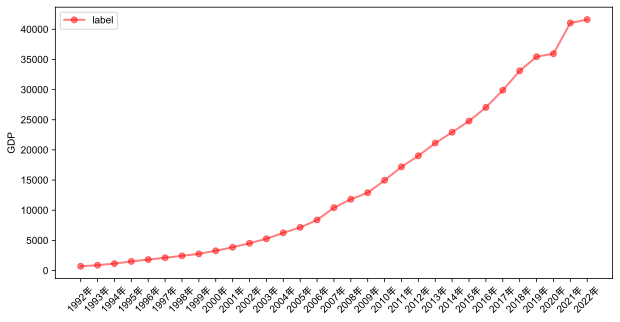

In [72]:
# plt.rc('font',family='SimHei')  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
set_figsize((10, 5))
plt.plot(GDP.iloc[0, 1:].values[::-1], 'o-', linewidth=2, color='r', label='label', alpha=0.5)
# plt.xlabel('xlabel')
plt.ylabel('GDP')
plt.xticks(range(len(GDP.columns[1:])), GDP.columns[1:][::-1], rotation=45)
plt.legend()
plt.show()

In [73]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

# 获取数据
data = GDP.iloc[0, 1:].values[::-1]

# 将数据归一化到 [0,1] 区间
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1))

# 定义一个函数，将时间序列数据转化为监督学习问题
def to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# 使用过去的 3 个观测值来预测下一个值
n_in = 3
n_out = 1
data = to_supervised(data, n_in, n_out)

# 分割输入数据和输出数据
X, y = data.iloc[:, :n_in], data.iloc[:, n_in:]

# 定义模型
model = MLPRegressor(hidden_layer_sizes=(1000,), activation='tanh', max_iter=20000, random_state=2, tol=1e-9)

# 拟合模型
model.fit(X, y)

# 预测未来的值
predictions = model.predict(X)

# 将预测值反归一化
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

# 打印出预测值
# print(predictions)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


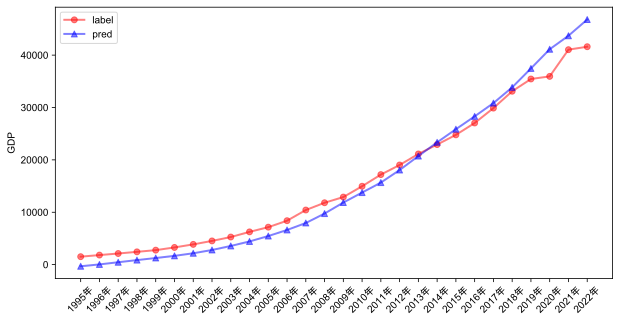

In [74]:
# plt.rc('font',family='SimHei')  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
set_figsize((10, 5))
plt.plot(GDP.iloc[0, 1:].values[::-1][3:], 'o-', linewidth=2, color='r', label='label', alpha=0.5)
plt.plot(predictions, '^-', linewidth=2, color='b', label='pred', alpha=0.5)
# plt.xlabel('xlabel')
plt.ylabel('GDP')
plt.xticks(range(len(GDP.columns[1:][3:])), GDP.columns[1:][::-1][3:], rotation=45)
plt.legend()
plt.show()

In [75]:
# 假设我们要预测的步数为 future_steps
future_steps = 30
predictions_future = []
last_n_values = list(data.iloc[-n_in:, 3]) # 注意这里是取最后n_in行的第一列
for _ in range(future_steps):
    X_pred = np.array(last_n_values).reshape(1, -1)
    y_pred = model.predict(X_pred)
    predictions_future.append(y_pred[0])
    
    # 将预测值添加到输入序列中
    last_n_values.append(y_pred[0])
    last_n_values = last_n_values[1:]
    
# 将预测值反归一化
predictions_future = scaler.inverse_transform(np.array(predictions_future).reshape(-1, 1))

# 打印出预测值
print(predictions_future)

[[ 49951.54720704]
 [ 55291.85056912]
 [ 62051.13635051]
 [ 70371.09850102]
 [ 78963.39763407]
 [ 88873.09691806]
 [ 99812.7122825 ]
 [111730.09093534]
 [124717.66396178]
 [138590.80576173]
 [153204.29608296]
 [168330.56727762]
 [183663.16420624]
 [198874.15592605]
 [213617.99714162]
 [227573.99540023]
 [240478.2948795 ]
 [252142.90404223]
 [262465.97776152]
 [271426.97055161]
 [279072.73589851]
 [285499.00121008]
 [290831.15079038]
 [295207.66299393]
 [298767.48845987]
 [301641.57520991]
 [303948.00075372]
 [305789.83724687]
 [307254.88881369]
 [308416.57281181]]


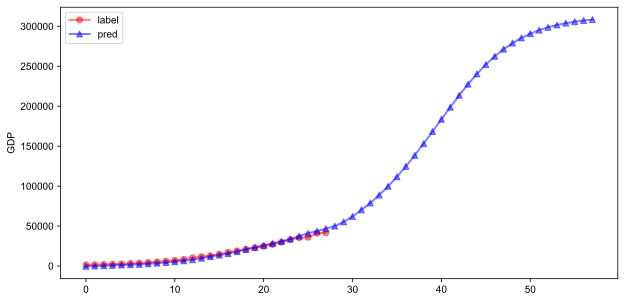

In [76]:
# plt.rc('font',family='SimHei')  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
set_figsize((10, 5))
plt.plot(GDP.iloc[0, 1:].values[::-1][3:], 'o-', linewidth=2, color='r', label='label', alpha=0.5)
plt.plot(np.vstack((predictions, predictions_future)), '^-', linewidth=2, color='b', label='pred', alpha=0.5)
# plt.xlabel('xlabel')
plt.ylabel('GDP')
# plt.xticks(range(len(GDP.columns[1:][3:])), GDP.columns[1:][::-1][3:], rotation=45)
plt.legend()
plt.show()